# 1. Modulos

In [13]:
import os
from pathlib import Path
from datetime import datetime, timedelta
import pandas as pd
import openpyxl

# 2. Rutas 

In [ ]:
# Validados
R_NS = r"C:\Users\crist\OneDrive - 891856000_CAPRESOCA E P S\Capresoca\AlmostClear\Procesos BDUA\Subsidiados\Procesos BDUA EPS\NS\NS validado\all-NS-VAL.txt"
# Glosados
#R_NS = r"C:\Users\crist\OneDrive - 891856000_CAPRESOCA E P S\Capresoca\AlmostClear\Procesos BDUA\Subsidiados\Procesos BDUA EPS\NS\NS Negado\all-NS-NEG.txt"

# 3. Cargue Datafarmes 

In [15]:
df_ns = pd.read_csv(R_NS, sep=',', dtype=str, encoding='latin-1')
# Convertir Fecha_Proceso a datetime y filtrar desde enero 2024
df_ns['Fecha_Proceso'] = pd.to_datetime(df_ns['Fecha_Proceso'], format='%d/%m/%Y')
df_ns = df_ns[df_ns['Fecha_Proceso'] >= '2022-01-01']
df_ns = df_ns.sort_values(by='NOVEDAD', ascending=False)

# 4. Validar
## 4.1. Columnas

In [16]:
df_ns.columns

Index(['Nombre_Archivo', 'NUM_SOLICITUD_NOVEDAD', 'ENT_ID', 'TPS_IDN_ID',
       'HST_IDN_NUMERO_IDENTIFICACION', 'AFL_PRIMER_APELLIDO',
       'AFL_SEGUNDO_APELLIDO', 'AFL_PRIMER_NOMBRE', 'AFL_SEGUNDO_NOMBRE',
       'AFL_FECHA_NACIMIENTO', 'MNC_ID', 'NOVEDAD', 'FECHA_NOVEDAD',
       'COD_1_NOVEDAD', 'COD_2_NOVEDAD', 'COD_3_NOVEDAD', 'COD_4_NOVEDAD',
       'COD_5_NOVEDAD', 'COD_6_NOVEDAD', 'COD_7_NOVEDAD', 'Glosa',
       'Fecha_Proceso'],
      dtype='object')

## 4.2. Numero de registros por novedad

In [17]:
df_ns['NOVEDAD'].value_counts().sort_index()

NOVEDAD
N01    2464
N02    1143
N03    1446
N04     426
N09     764
N12    5890
N14    1139
N17     254
N19     287
N20       3
N21    7222
N25    9251
N31    2287
N32     983
N35       3
N36     140
N39    1823
N41      21
N43     142
N46     151
Name: count, dtype: int64

## 4.3. N14 Actualización o cambio de estado de afiliación

In [18]:
# Filtrar registros donde NOVEDAD es N14
df_n14 = df_ns[df_ns['NOVEDAD'] == 'N14']

# Obtener un registro por cada grupo de COD_1_NOVEDAD
muestra_n14 = df_n14.groupby('COD_1_NOVEDAD').first().reset_index()

print(f"Total de grupos distintos en COD_1_NOVEDAD para N14: {len(muestra_n14)}")
print("\nRegistros de muestra (1 por cada COD_1_NOVEDAD):")
print(muestra_n14)

Total de grupos distintos en COD_1_NOVEDAD para N14: 3

Registros de muestra (1 por cada COD_1_NOVEDAD):
  COD_1_NOVEDAD        Nombre_Archivo NUM_SOLICITUD_NOVEDAD  ENT_ID  \
0            RE  NSEPS02523022024.NEG                   101  EPS025   
1            SD  NSEPS02521022025.NEG                   208  EPS025   
2            SM  NSEPS02523022024.NEG                   103  EPS025   

  TPS_IDN_ID HST_IDN_NUMERO_IDENTIFICACION AFL_PRIMER_APELLIDO  \
0         TI                    1029653061            VALBUENA   
1         PE               940312810091993          BARRIENTOS   
2         CC                    1052314054             SANCHEZ   

  AFL_SEGUNDO_APELLIDO AFL_PRIMER_NOMBRE AFL_SEGUNDO_NOMBRE  ... NOVEDAD  \
0              CHAVITA            JHOJAN             ANDRES  ...     N14   
1           SANTAMARIA          BRIGHITH            ALEXAND  ...     N14   
2             MENDIETA             DIEGO           FERNANDO  ...     N14   

  FECHA_NOVEDAD COD_2_NOVEDAD COD_3_NOVE

## 4.4. N17 filtro

In [19]:
# Filtrar registros donde NOVEDAD es N17
df_n17 = df_ns[df_ns['NOVEDAD'] == 'N17']

## 4.5. N21 filtro

In [20]:
# Filtrar registros donde NOVEDAD es N21 y COD_3_NOVEDAD es diferente a '5'
df_n21 = df_ns[(df_ns['NOVEDAD'] == 'N21') & (df_ns['COD_3_NOVEDAD'] != '5')]

# 5. Estadisticas
## 5. novedades totales por año 

Tabla de registros por año:
    Año  Total Registros
0  2022             4677
1  2023            11597
2  2024             7594
3  2025            11971

Total general: 35,839 registros


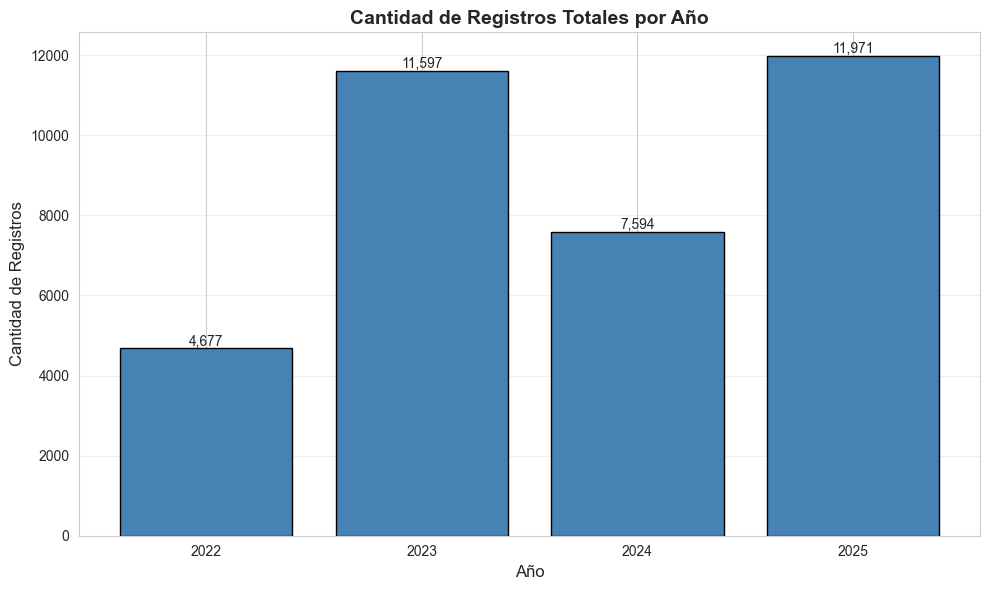

In [21]:
# Extraer el año de Fecha_Proceso y contar registros por año
registros_por_año = df_ns['Fecha_Proceso'].dt.year.value_counts().sort_index()

# Crear una tabla comparativa
tabla_años = pd.DataFrame({
    'Año': registros_por_año.index,
    'Total Registros': registros_por_año.values
})

print("Tabla de registros por año:")
print(tabla_años)
print(f"\nTotal general: {tabla_años['Total Registros'].sum():,} registros")

# Crear gráfica
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(registros_por_año.index, registros_por_año.values, color='steelblue', edgecolor='black')
plt.xlabel('Año', fontsize=12)
plt.ylabel('Cantidad de Registros', fontsize=12)
plt.title('Cantidad de Registros Totales por Año', fontsize=14, fontweight='bold')
plt.xticks(registros_por_año.index)
plt.grid(axis='y', alpha=0.3)

# Añadir valores encima de las barras
for año, cantidad in zip(registros_por_año.index, registros_por_año.values):
    plt.text(año, cantidad, f'{cantidad:,}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Registros por mes y año:
Año    2022   2023  2024   2025  Total
Mes                                   
1       490    334   591    564   1979
2       309    296   352    688   1645
3       531    316  2946    356   4149
4       252    276   477    360   1365
5       488    383   761   1385   3017
6       520    228   394   3075   4217
7       436    228   118   3124   3906
8       298   4505   346    998   6147
9       268    578   472    481   1799
10      358   1717   416    711   3202
11      210   2021   399    229   2859
12      517    715   322      0   1554
Total  4677  11597  7594  11971  35839


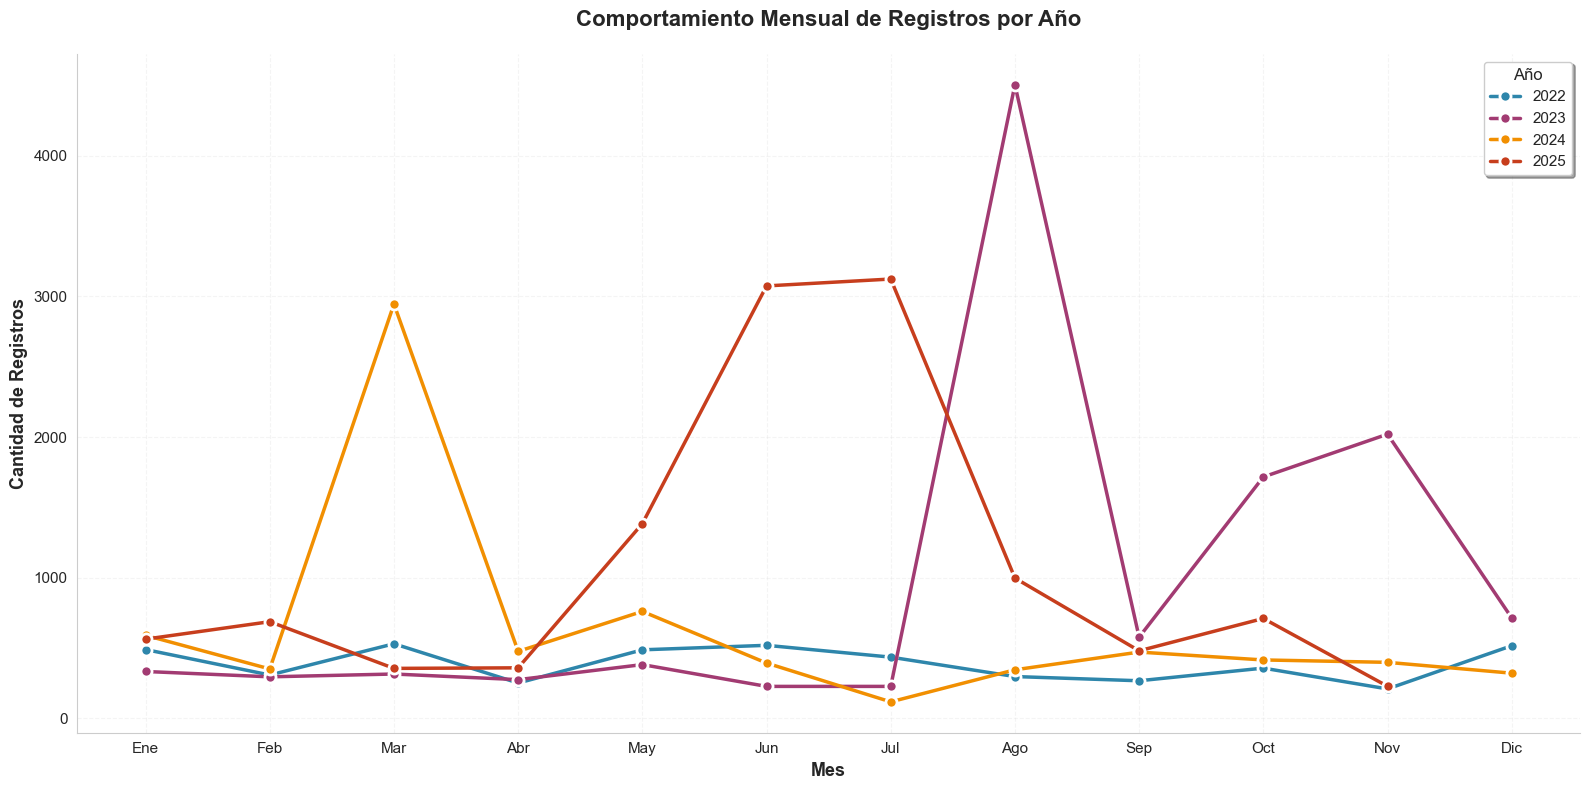

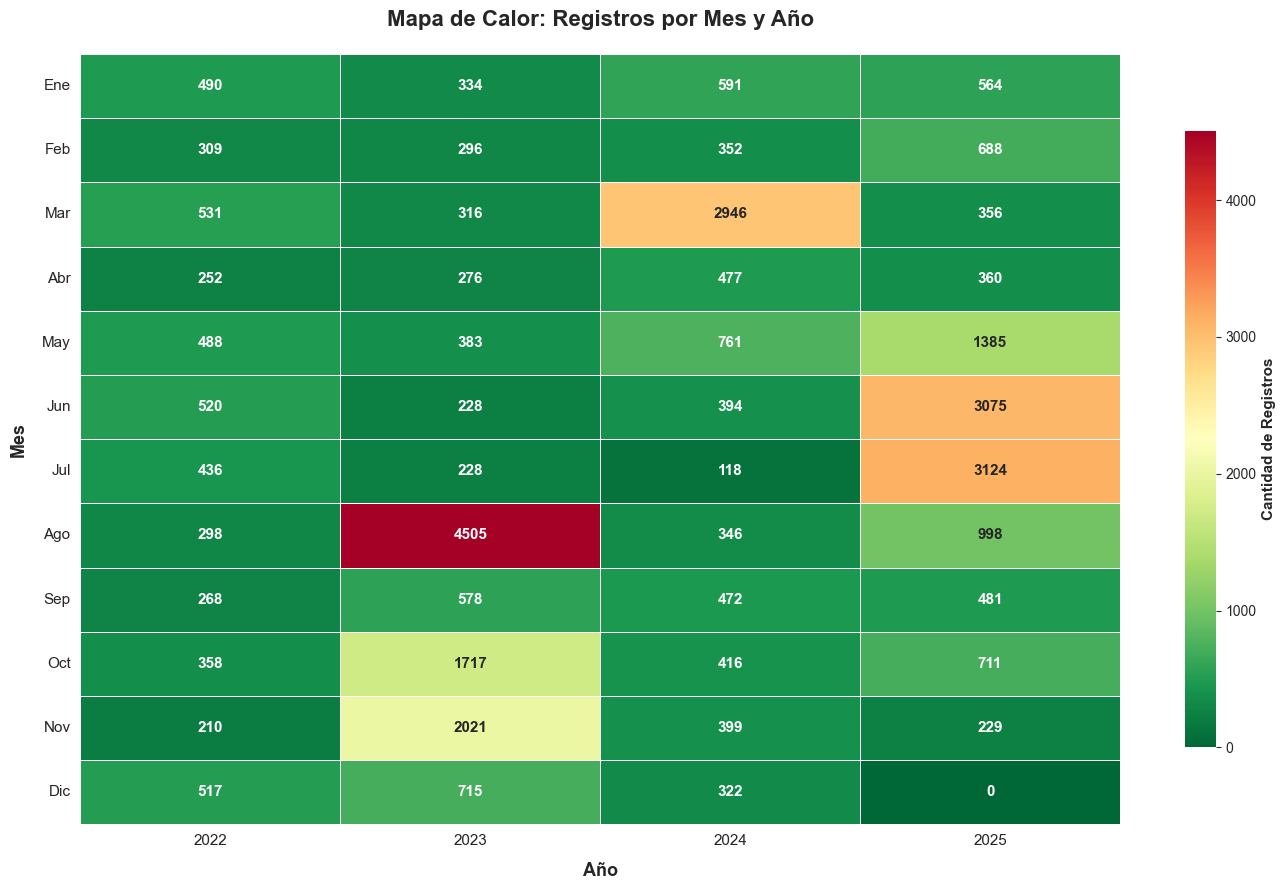

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar estilo general
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

# Extraer mes y año de Fecha_Proceso
df_ns['Mes'] = df_ns['Fecha_Proceso'].dt.month
df_ns['Año'] = df_ns['Fecha_Proceso'].dt.year
df_ns['Año_Mes'] = df_ns['Fecha_Proceso'].dt.to_period('M')

# Crear tabla de registros por mes y año
registros_mes_año = pd.crosstab(df_ns['Mes'], df_ns['Año'], margins=True, margins_name='Total')

print("Registros por mes y año:")
print(registros_mes_año)

# Definir paleta de colores personalizada
colores = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']

# Crear gráfica de líneas mejorada
plt.figure(figsize=(16, 8))
ax = plt.gca()

# Graficar cada año con estilo mejorado
for idx, año in enumerate(sorted(df_ns['Año'].unique())):
    datos_año = df_ns[df_ns['Año'] == año].groupby('Mes').size()
    plt.plot(datos_año.index, datos_año.values, 
             marker='o', label=f'{año}', linewidth=2.5, 
             color=colores[idx % len(colores)], markersize=8,
             markeredgewidth=2, markeredgecolor='white')

plt.xlabel('Mes', fontsize=13, fontweight='bold')
plt.ylabel('Cantidad de Registros', fontsize=13, fontweight='bold')
plt.title('Comportamiento Mensual de Registros por Año', 
          fontsize=16, fontweight='bold', pad=20)
plt.legend(title='Año', fontsize=11, title_fontsize=12, 
           frameon=True, shadow=True, fancybox=True)
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 
                          'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'],
           fontsize=11)
plt.yticks(fontsize=11)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(True, alpha=0.2, linestyle='--')
plt.tight_layout()
plt.show()

# Crear heatmap mejorado
plt.figure(figsize=(14, 9))

# Preparar datos sin totales para el heatmap
datos_heatmap = registros_mes_año.iloc[:-1, :-1]

# Crear heatmap con mejor estética
ax = sns.heatmap(datos_heatmap, annot=True, fmt='d', 
                 cmap='RdYlGn_r', linewidths=0.5, linecolor='white',
                 cbar_kws={'label': 'Cantidad de Registros', 'shrink': 0.8},
                 annot_kws={'size': 11, 'weight': 'bold'},
                 xticklabels=datos_heatmap.columns,
                 yticklabels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 
                             'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

plt.xlabel('Año', fontsize=13, fontweight='bold', labelpad=10)
plt.ylabel('Mes', fontsize=13, fontweight='bold', labelpad=10)
plt.title('Mapa de Calor: Registros por Mes y Año', 
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(fontsize=11, rotation=0)
plt.yticks(fontsize=11, rotation=0)

# Mejorar colorbar
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
cbar.set_label('Cantidad de Registros', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

## Novedades por categorias año a año

Tabla comparativa de registros por grupo de novedad y año:
Año            2022   2023  2024   2025  Total
Grupo_Novedad                                 
N01             727    569   428    740   2464
N02             308    188   223    424   1143
N03             378    264   313    491   1446
N04             231    118    36     41    426
N09             446     62    40    216    764
N12               0      0     0   5890   5890
N14             488    136   203    312   1139
N17             108     93    40     13    254
N19              78     47    14    148    287
N20               3      0     0      0      3
N21             454   1428  4265   1075   7222
N25             668   6765  1103    715   9251
N31             460   1085   407    335   2287
N32               8     73    82    820    983
N35               0      3     0      0      3
N36              16     41    43     40    140
N39             304    725   397    397   1823
N41               0      0     0     21     21
N

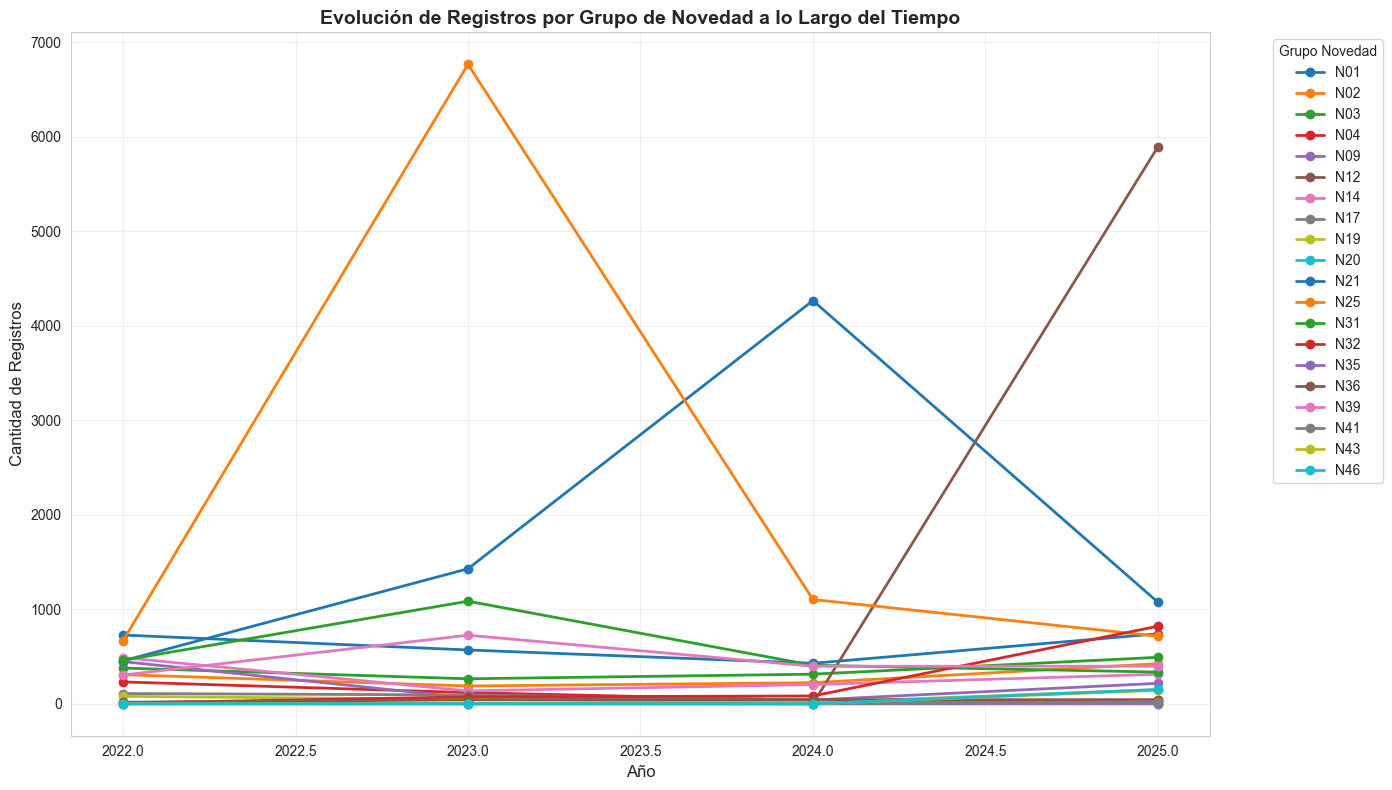

<Figure size 1400x800 with 0 Axes>

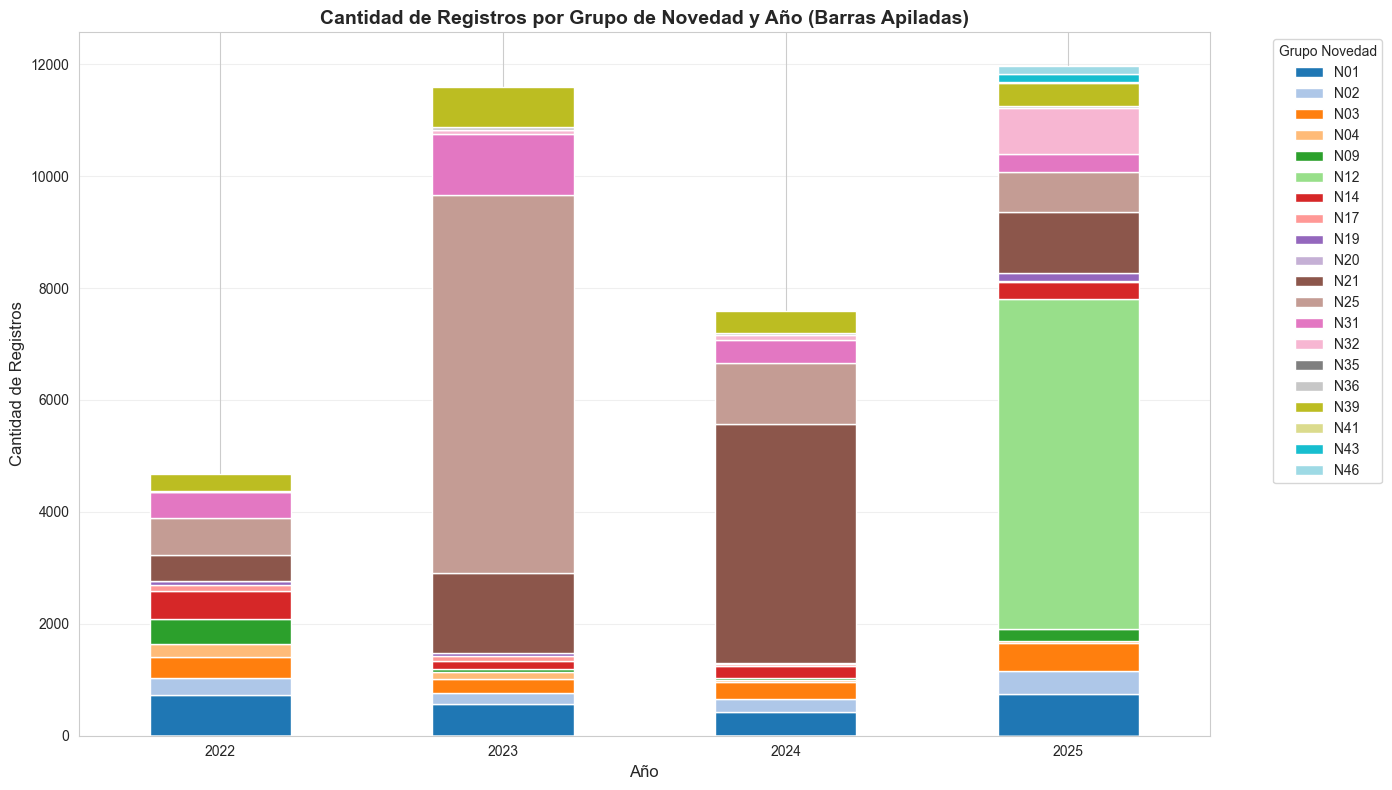

In [23]:
# Crear grupos de novedades basados en el prefijo (N01, N02, etc.)
df_ns['Grupo_Novedad'] = df_ns['NOVEDAD'].str[:3]
df_ns['Año'] = df_ns['Fecha_Proceso'].dt.year

# Crear tabla comparativa de registros por grupo de novedad y año
tabla_comparativa = pd.crosstab(df_ns['Grupo_Novedad'], df_ns['Año'], margins=True, margins_name='Total')
tabla_comparativa = tabla_comparativa.sort_index()

print("Tabla comparativa de registros por grupo de novedad y año:")
print(tabla_comparativa)
print("\n")

# Crear gráfica de líneas para ver la evolución temporal
import matplotlib.pyplot as plt

# Preparar datos para la gráfica (sin los totales)
datos_grafica = pd.crosstab(df_ns['Grupo_Novedad'], df_ns['Año'])

plt.figure(figsize=(14, 8))

# Graficar cada grupo de novedad
for grupo in datos_grafica.index:
    plt.plot(datos_grafica.columns, datos_grafica.loc[grupo], marker='o', label=grupo, linewidth=2)

plt.xlabel('Año', fontsize=12)
plt.ylabel('Cantidad de Registros', fontsize=12)
plt.title('Evolución de Registros por Grupo de Novedad a lo Largo del Tiempo', fontsize=14, fontweight='bold')
plt.legend(title='Grupo Novedad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Crear gráfica de barras apiladas para comparación visual
plt.figure(figsize=(14, 8))

datos_grafica.T.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')
plt.xlabel('Año', fontsize=12)
plt.ylabel('Cantidad de Registros', fontsize=12)
plt.title('Cantidad de Registros por Grupo de Novedad y Año (Barras Apiladas)', fontsize=14, fontweight='bold')
plt.legend(title='Grupo Novedad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()